## Regularization Ridge Regression

### Impose a penalty on the size of coefficients $\min_{\theta} {{|| X * \theta - y||_2} + \alpha {||\theta||_2}}$
Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity

The L2 norm is calculated as the square root of the sum of the squared vector values.
$||v||_{2} = \sqrt{x_1^2 + ... + x_n^2 }$

The term "norm" is commonly used to refer to the vector norm in Euclidean space. It is known as the "Euclidean norm" which is technically called the L2-norm. The Euclidean norm maps a vector to its length in Euclidean space. Because of this, the Euclidean norm is often known as the magnitude.

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

__First we need some data. Let us use the Yacht Hydrodynamics Data Set provided on eCampus.__ __"yacht_hydrodynamics.data"__

Data from: Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics# 

__Below is the file description.__
Variations concern hull geometry coefficients and the Froude number:
1. Longitudinal position of the center of buoyancy, adimensional. (CB)
2. Prismatic coefficient, adimensional. (PrismCoeff)
3. Length-displacement ratio, adimensional. (LbyD)
4. Beam-draught ratio, adimensional. (BbyT)
5. Length-beam ratio, adimensional. (LbyB)
6. Froude number, adimensional. (FrNo)
7. Residuary resistance per unit weight of displacement, adimensional (RRes)



__Let us set Path and Read All data from Excel File__

In [2]:
import os
path = os.getcwd() + '\\yacht_hydrodynamics.data'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
data = pd.read_csv(path, sep='\s+',  header = None) 
data.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [3]:
data.columns=["CB","PrismCoeff","LbyD","BbyT","LbyB","FrNo","RRes"]
data.head()

,CB,PrismCoeff,LbyD,BbyT,LbyB,FrNo,RRes
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


<AxesSubplot:xlabel='FrNo', ylabel='RRes'>

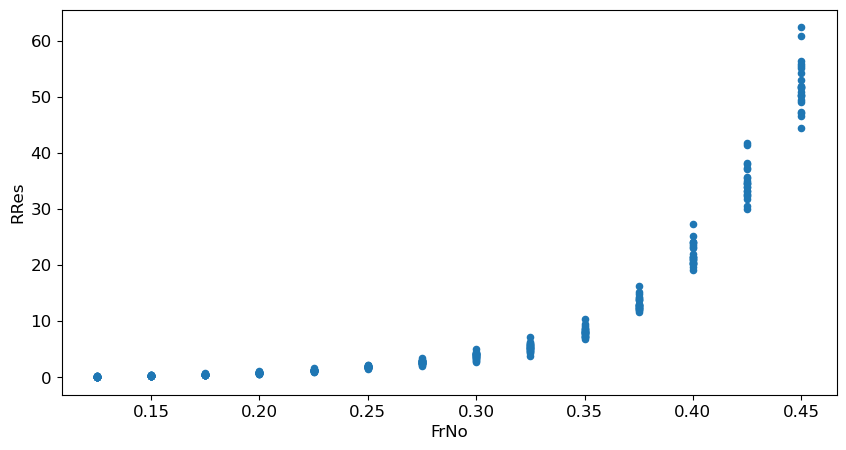

In [4]:
data.plot(kind='scatter', x='FrNo', y='RRes', figsize=(10,5))

In [5]:
# Create X & Y
# Assigning dataset to template X & y
X = data.iloc[:, :-1].values # All except last column
y = data.iloc[:, -1].values # Last Column

In [6]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

93 93


## Polynomial MODEL ##

In [7]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
# Generate a new feature matrix consisting of all polynomial combinations of the features
# with degree less than or equal to the specified degree. For example, if an input sample
# is two dimensional and of the form [a, b], the degree-2 polynomial features are
# [1, a, b, a^2, ab, b^2].

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

poly_reg.fit(X_poly_train, y_train)
lin_reg_Poly = LinearRegression()
lin_reg_Poly.fit(X_poly_train, y_train)
X_poly_train.shape

(215, 210)

### Ridge Regression 

_A penalty can be added to the cost function for linear regression and is referred to as Tikhonov regularization (after the author), or Ridge Regression more generally._

_A hyperparameter is used called $\alpha$ that controls the weighting of the penalty to the loss function. A default value of 1.0 will fully weight the penalty; a value of 0 excludes the penalty. Very small values of $\alpha$, such as 1e-3 or smaller are common._

_ridge_loss = loss + ($\alpha$ * L2_penalty)_

In [8]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha --> more generalization, coefficients are barely restricted
# Then in this case linear and ridge regression resembles
# 1.
rr = Ridge(alpha=1e-22) # from sklearn.linear_model import Ridge
rr.fit(X_poly_train, y_train)

# 2.
#  Try different alpha value
rr100 = Ridge(alpha=100) 
rr100.fit(X_poly_train, y_train)

Ridge(alpha=100)

In [9]:
train_score=lin_reg_Poly.score(X_poly_train, y_train)
test_score=lin_reg_Poly.score(X_poly_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score) 

linear regression train score: 0.9982945867513513
linear regression test score: 0.9973923421552634


In [10]:
Ridge_train_score = rr.score(X_poly_train,y_train)
Ridge_test_score = rr.score(X_poly_test, y_test)
print("ridge regression train score low alpha:", Ridge_train_score) 
print("ridge regression test score low alpha:", Ridge_test_score) 

ridge regression train score low alpha: 0.9994089749295249
ridge regression test score low alpha: 0.9976433430010878


In [11]:
Ridge_train_score100 = rr100.score(X_poly_train,y_train)
Ridge_test_score100 = rr100.score(X_poly_test, y_test)
print("ridge regression train score high alpha:", Ridge_train_score100) 
print("ridge regression test score high alpha:", Ridge_test_score100) 

ridge regression train score high alpha: 0.7938594720880908
ridge regression test score high alpha: 0.7337733459094493


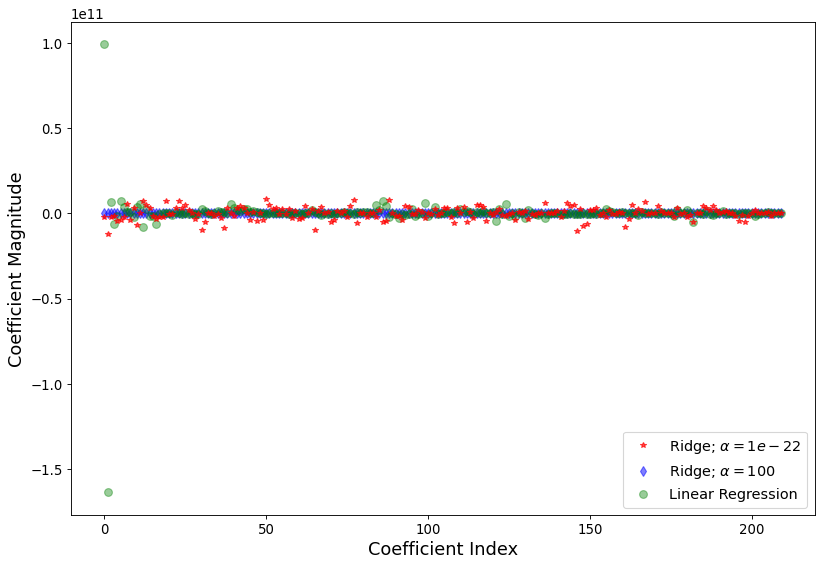

In [12]:
# Plots
# zorder for ordering the markers
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 1e-22$',zorder=7) 
# alpha --> transparency
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lin_reg_Poly.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
#plt.ylim(-1e10,1e10)
plt.show()


### $\alpha$ penalizes coefficients
#### Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
#### Collinearity is a condition in which some of the independent variables are highly correlated.